# Count number of tweets in pre-defined time period

In [3]:
# Import Libraries
import os
from pathlib import Path
import argparse
import datetime, dateutil
import json
import pickle

import numpy as np
import pandas as pd
import csv
# import gensim

import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

import torch
import torchtext
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction
import mittens
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /h/ypark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /h/ypark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Load all tweets by month
tweets_dir = "/h/ypark/tweet_covid/output/"
days_lst = [30,60,90, 120,150,180]
tweets_dict = {}
def load_tweets(tweet_dir, days):
    fn = Path(tweet_dir, "tweet_{}day.csv".format(days))
    tweets = pd.read_csv(fn)
    return tweets


for days in days_lst:
    tweets_dict[days] = load_tweets(tweets_dir, days)
    

In [5]:
tweets_dict[90] = load_tweets(tweets_dir, 90)

In [6]:
# Count number of tweets
num_tweets = {}
for days in days_lst:
    num_tweets[days] = len(tweets_dict[days])

In [7]:
for days in days_lst:
    print("{} - {} days: {}".format(days - 30, days, num_tweets[days]))

0 - 30 days: 599541
30 - 60 days: 2151703
60 - 90 days: 9712887
90 - 120 days: 8000000
120 - 150 days: 15112853
150 - 180 days: 2675760


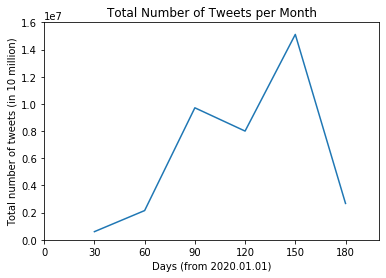

In [12]:
fig, ax = plt.subplots()
ax.plot(days_lst, np.array(list(num_tweets.values()))) 
ax.set(xlim=[0,200], ylim=[0, 16000000], title="Total Number of Tweets per Month", 
      xlabel='Days (from 2020.01.01)',
      ylabel='Total number of tweets (in 10 million)')
ax.xaxis.set(ticks=np.arange(0,200,30))
fig.savefig('/h/ypark/tweet_covid/hatespeech/output/plots/tweet_count.png', dpi=300)
fig.show()